# Competition 1 #

#### Research Question & Goal ####

What are the determinants of the IPO underpricing phenomena? It is our job as a group to understand and identify the underlying determinants that factor into IPO underpricing.

### Business Understanding ###

According to Investopedia.com, Underpricing is the listing of an intial public offering (IPO) below its market value. When the offer price of the stock is lower than the price of the first trade, the stock is considered to be underpriced. This will only last for a short amount of time, as the demand of the stock is going to drive it back up to its value.

From a company standpoint, they wish to have the intial public offering as high as possible, which in turn raises the most capital. The quantitative factors that go into an initial public offering are all financial analysis reports from the company itself. Before the IPO, the company will be analyzed by its sales, expenses, earnings, and cash flow. Furthermore, a company's earnings and expected earnings growth are the biggest factors in the IPO. Marketability in a specific industry and the general market also can drive an IPO up or down.

Once the investment bankers or IPO underwriters determine the IPO price of the company's stock, the day before the stock is offered publically, the company will market the IPO to potential investors. For historical purposes, IPOs are viewed as risky investments because of the lack of historical data that is collected on them. The less liquidity that the stock/company has and predicatble IPO shares are going to be, the more likely they are going to be underprices to compensate for assumed risk. Company's also underprice their IPO to entice more investors to buy stocks to raise more capital.

With all of this information about intial public offerings, is there a few determinants that can be identified as to why the phenomenon of underpricing exists? The dataset that we have been provided provide information about companies and information regarding their IPO, such as IPO Offering, IPO Characteristics, Textual Characterisitics, Sentiment Characteristics, Target Variables, Control Variables, and IPO Identifiers.

The variables that have been provided are listed below:

 - P(IPO) - Offer Price
 - P(H) - Price Range Higher Bound
 - P(L) - Price Range Lower Bound
 - P(1Day) - First Day Trading Price
 - C1 - Days
 - C2 - Top-Tier Dummy
 - C3 - Earnings per Share
 - C4 - Prior NASDAQ 15-Day Returns
 - C5 - Outstanding Shares
 - C6 - Offering Shares
 - C7 - Sales
 - T1 - Number of Sentences
 - T2 - Number of Words
 - T3 - Number of Real Words
 - T4 - Number of Long Sentences
 - T5 - Number of Long Words
 - S1 - Number of Positive Words
 - S2 - Number of Negative Words
 - S3 - Number of Uncertain Words
 - Y1 - Pre-IPO Price Revision
 - Y2 - Post-IPO Initial Return
 - C3' - Positive EPS Dummy
 - C5' - Share Overhang
 - C6' - Up Revision
 - I1 - Ticker
 - I2 - Company Name
 - I3 - Standard Industry Classifier

## Data Understanding ##

In [107]:
# Importing useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn import datasets
from scipy.stats import iqr
from sklearn import preprocessing

# Read in the .xlsx datafile and converting into a DataFrame
data = pd.read_excel("../2019-competition1-the-dundies/Competition1_raw_data.xlsx",header=0,na_values="-")
df_data = pd.DataFrame(data)

In [108]:
# Understanding the datatypes for the features
print(df_data.head())

     I1                                  I2    I3  P(IPO)  P(H)  P(L)  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674    10.0   9.5   8.5   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834     8.0  10.0   8.0   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834     7.0  14.0  12.0   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834    11.5  16.0  14.0   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492    21.0  21.0  19.0   

     P(1Day)     C1   C2    C3  ...            C6       C7     T1       T2  \
0  11.870000  122.0  1.0  3.43  ...    10600000.0   51.345  470.0  12719.0   
1   7.250000  259.0  0.0 -1.62  ...     2400000.0   25.936  791.0  21792.0   
2   6.700000   90.0  1.0 -1.24  ...     5000000.0    7.378  201.0   5262.0   
3  12.390000  209.0  1.0 -0.91  ...     4500000.0    8.526  328.0   8259.0   
4  56.599998   80.0  1.0  0.07  ...     8250000.0  632.298  572.0  14830.0   

        T3     T4      T5    S1     S2     S3  
0  11560.0  301.0   690.0  62.0  117.0  139.

__We will remove the column headers that have parentheses in them to underscores, as it will be easier to reference those columns.__

In [109]:
# Renaming Column Headers with '()' in it
cols = ['I1','I2','I3','P_IPO','P_H','P_L','P_1Day','C1','C2','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']

# Define columns of 'df_data' using 'cols'
df_data.columns = cols

# Displaying the first 5 rows of dataframe 'df_data'
# it should show 22 columns
print(df_data.head())

     I1                                  I2    I3  P_IPO   P_H   P_L  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674   10.0   9.5   8.5   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834    8.0  10.0   8.0   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834    7.0  14.0  12.0   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834   11.5  16.0  14.0   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492   21.0  21.0  19.0   

      P_1Day     C1   C2    C3  ...            C6       C7     T1       T2  \
0  11.870000  122.0  1.0  3.43  ...    10600000.0   51.345  470.0  12719.0   
1   7.250000  259.0  0.0 -1.62  ...     2400000.0   25.936  791.0  21792.0   
2   6.700000   90.0  1.0 -1.24  ...     5000000.0    7.378  201.0   5262.0   
3  12.390000  209.0  1.0 -0.91  ...     4500000.0    8.526  328.0   8259.0   
4  56.599998   80.0  1.0  0.07  ...     8250000.0  632.298  572.0  14830.0   

        T3     T4      T5    S1     S2     S3  
0  11560.0  301.0   690.0  62.0  117.0  139.0  
1 

In [110]:
# Describing the Data
print(df_data.describe())

            P_IPO         P_H         P_L       P_1Day           C1  \
count  677.000000  672.000000  672.000000   660.000000   660.000000   
mean    13.837666   15.481190   13.515045    25.934766   149.728788   
std      6.053731    6.653429    5.835646    73.234948   152.817467   
min      3.000000    0.000000    3.000000     0.000000    10.000000   
25%     10.000000   12.500000   11.000000    11.000000    85.000000   
50%     13.500000   15.000000   13.000000    14.845000   107.000000   
75%     17.000000   17.000000   15.000000    20.485000   155.250000   
max     85.000000  135.000000  108.000000  1159.200562  2087.000000   

               C2           C3          C4            C5            C6  \
count  660.000000   646.000000  660.000000  6.760000e+02  6.760000e+02   
mean     0.859091     1.788904    0.007282  4.935776e+07  1.241519e+07   
std      0.348192   162.666532    0.033318  1.043764e+08  2.512855e+07   
min      0.000000  -786.239000   -0.162352  3.693227e+06  5.2500

In [111]:
# Defining the Data Types of the Data
print(df_data.dtypes)

I1         object
I2         object
I3         object
P_IPO     float64
P_H       float64
P_L       float64
P_1Day    float64
C1        float64
C2        float64
C3        float64
C4        float64
C5        float64
C6        float64
C7        float64
T1        float64
T2        float64
T3        float64
T4        float64
T5        float64
S1        float64
S2        float64
S3        float64
dtype: object


### Understanding Missing Values ###

Upon intial investigation, there seem to be no missing values, which is great.

But doing some further digging, there are missing values, but the 'for loop', it does not pick up on dashes/hyphens. To show that there are missing values in the dataset.

In [112]:
# Creating an empty list for column names
names = []

# Creating an empty list for the number of null values in each column
values = []

# Checking for Missing Values
for col in df_data.columns:
    names.append(col)
    values.append(df_data[col].isnull().sum())
    print(names[-1],values[-1])

I1 0
I2 0
I3 8
P_IPO 5
P_H 10
P_L 10
P_1Day 22
C1 22
C2 22
C3 36
C4 22
C5 6
C6 6
C7 72
T1 1
T2 1
T3 1
T4 1
T5 1
S1 1
S2 1
S3 1


Text(0, 0.5, 'Count of Missing Value')

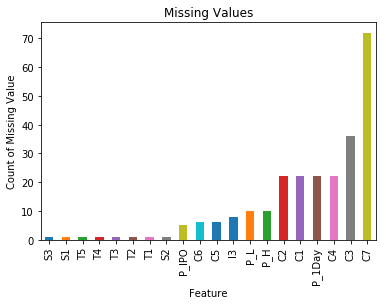

In [113]:
# Creating a graph to visulize missing values
missing_values = df_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()

# Adding peripherials to graph
plt.title('Missing Values')
plt.xlabel('Feature')
plt.ylabel('Count of Missing Value')

##### More Missing Values ####

There are only two columns `I1` and `I2` that do not have any "hyphens" or missing values.

The issue that we have now is how to deal with these missing values.

It is unique to see that columns `T1` through `S3` all have 1 missing value. Is it safe to assume that the individual missing values from those columns all belong to one record? Possibly. We will have to identify that one record if that is the case.

#### Imputing Missing Values ####

We are going to start by imputing values 1 column at a time, as not all the columns will call for the same imputation.

We will begin with column `I3`, as we can find the SIC code online through multiple websites for cross-checking and validation.

In [114]:
# Identifying the row that has the missing values for Column 'I3'
df_data[df_data['I3'].isnull()]

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,332.0,7534.0,6747.0,169.0,263.0,51.0,65.0,74.0
86,BLT,BLOUNT INTERNATIONAL INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,538.0,12732.0,11126.0,301.0,631.0,94.0,172.0,116.0
268,GSL,GLOBAL SIGNAL INC,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,NaN,631.0,19479.0,17409.0,451.0,976.0,71.0,252.0,155.0
330,KFI,KKR Financial Holdings LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,246.0,527.0,9046.0,355.0,10277.0,64.0,48.0,123.0
400,NAUH,"National American University Holdings, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,290.0,8454.0,7137.0,192.0,384.0,45.0,68.0,139.0
490,RCH,"CHINA CGAME, INC.",NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,737000.0,NaN,322.0,9820.0,8893.0,230.0,410.0,61.0,92.0,91.0
597,TRMM,"Access to Money, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,494.0,12004.0,10226.0,277.0,560.0,46.0,100.0,91.0
614,TZOO,TRAVELZOO INC,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,146.0,3600.0,3189.0,88.0,181.0,5.0,26.0,38.0


In [115]:
# Imputation for SIC Codes for Column 'I3'
df_data.loc[df_data.index[10], 'I3']=8748
df_data.loc[df_data.index[86], 'I3']=5251
df_data.loc[df_data.index[268], 'I3']=6282
df_data.loc[df_data.index[330], 'I3']=7389
df_data.loc[df_data.index[400], 'I3']=6211
df_data.loc[df_data.index[490], 'I3']=7372
df_data.loc[df_data.index[597], 'I3']=6099
df_data.loc[df_data.index[614], 'I3']=4724

# Redisplaying Column 'I3' checking for missing values after imputing
df_data[df_data['I3'].isnull()]

# Making the datatype of column `I3` str
df_data['I3'].astype(str);

In [116]:
# Imputation for IPO final offering price for 'P_IPO'
df_data.loc[df_data.index[10], 'P_IPO']=9.5
df_data.loc[df_data.index[86], 'P_IPO']=16.5
df_data.loc[df_data.index[330], 'P_IPO']=24.0
df_data.loc[df_data.index[400], 'P_IPO']=8.0
df_data.loc[df_data.index[597], 'P_IPO']=11.0

df_data[df_data['P_IPO'].isnull()]

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [117]:
# Imputation for `C7` Sales
## We are using the `Mean` for imputing the sales values for column `C7`
df_data['C7'].fillna(df_data['C7'].mean(), inplace=True)

In [118]:
# Imputing for `P_H` and `P_L`
df_data['P_H'].fillna(df_data['P_H'].mean(), inplace=True)
df_data['P_L'].fillna(df_data['P_L'].mean(), inplace=True)

In [119]:
# Imputing for `P_1Day`
## We are using the 'Median' for imputing the P_1Day missing values, as the mean is higher than the median, indicating skewness
df_data['P_1Day'].fillna(df_data['P_1Day'].median(), inplace=True)

In [120]:
# Imputing for `C1` through `C4`
## We are imputing for column `C1` using the median
df_data['C1'].fillna(df_data['C1'].median(), inplace=True)

## We are imputing for column `C2` using the mode
df_data['C2'].fillna(df_data['C2'].mode()[0], inplace=True)

## We are imputing for column `C3` using the mean
df_data['C3'].fillna(df_data['C3'].mean(), inplace=True)

## We are imputing for column `C4` using the mean
df_data['C4'].fillna(df_data['C4'].mean(), inplace=True)

## We are imputing for column `C5` using the mean
df_data['C5'].fillna(df_data['C5'].mean(), inplace=True)

## We are imputing for column `C6` using the median
df_data['C6'].fillna(df_data['C6'].median(), inplace=True)

In [121]:
# Imputation for columns `T1` through `S3`
## There is only 1 row that has these missing values in these columns
### EURX EURAND N.V.
df_data.loc[df_data['T1'].isnull()]

# Imputing the values for this row would be the most accurate if we find the data from the year of EURX's IPO (2007)
## We will impute the values using the Mean of the columns with missing values
df_data['T1'].fillna(df_data['T1'].mean(), inplace=True)
df_data['T2'].fillna(df_data['T2'].mean(), inplace=True)
df_data['T3'].fillna(df_data['T3'].mean(), inplace=True)
df_data['T4'].fillna(df_data['T4'].mean(), inplace=True)
df_data['T5'].fillna(df_data['T5'].mean(), inplace=True)
df_data['S1'].fillna(df_data['S1'].mean(), inplace=True)
df_data['S2'].fillna(df_data['S2'].mean(), inplace=True)
df_data['S3'].fillna(df_data['S3'].mean(), inplace=True)

# Re-checking to make sure that there is no row with any missing values in column `T1`
df_data.loc[df_data['T1'].isnull()]

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [122]:
### Create new columns for T and S dividing with T1 and T2
df_data["T3'"]=df_data['T3']/df_data['T2']
df_data["T4'"]=df_data['T4']/df_data['T1']
df_data["T5'"]=df_data['T5']/df_data['T2']
df_data["S1'"]=df_data['S1']/df_data['T2']
df_data["S2'"]=df_data['S2']/df_data['T2']
df_data["S3'"]=df_data['S3']/df_data['T2']

In [145]:
### Adding Target Variables
df_data['Y1']=np.where(df_data['P_IPO']<((df_data['P_H']+df_data['P_L'])/2),1,0)
df_data['Y2']=np.where(df_data['P_IPO']<df_data['P_1Day'],1,0)

In [146]:
print(df_data.head())

     I1                                  I2    I3  P_IPO   P_H   P_L  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674   10.0   9.5   8.5   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834    8.0  10.0   8.0   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834    7.0  14.0  12.0   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834   11.5  16.0  14.0   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492   21.0  21.0  19.0   

      P_1Day       C1   C2    C3 ...          C6       C7       T3'       T4'  \
0  11.870000   51.345  1.0  3.43 ...  10600000.0   51.345  0.908876  0.640426   
1   7.250000   25.936  0.0 -1.62 ...   2400000.0   25.936  0.898724  0.644753   
2   6.700000    7.378  1.0 -1.24 ...   5000000.0    7.378  0.909350  0.636816   
3  12.390000    8.526  1.0 -0.91 ...   4500000.0    8.526  0.917060  0.539634   
4  56.599998  632.298  1.0  0.07 ...   8250000.0  632.298  0.888469  0.587413   

        T5'       S1'       S2'       S3'  Y1  Y2  
0  0.054250  0.004875  0.009

In [124]:
# Dropping columns that have been used to create "prime" columns
df_data = df_data.drop(['T1','T2','T3','T4','T5','S1','S2','S3'],axis=1)
df_data.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C3,C4,C5,C6,C7,T3',T4',T5',S1',S2',S3'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,51.345,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,0.909350,0.636816,0.061764,0.011593,0.006271,0.011403
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,0.917060,0.539634,0.061630,0.009686,0.007144,0.013319
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,0.888469,0.587413,0.048550,0.004518,0.010047,0.011261


In [125]:
# Re-checking imputations were correctly filling in missing values
for col in df_data.columns:
    names.append(col)
    values.append(df_data[col].isnull().sum())
    print(names[-1],values[-1])

I1 0
I2 0
I3 0
P_IPO 0
P_H 0
P_L 0
P_1Day 0
C1 0
C2 0
C3 0
C4 0
C5 0
C6 0
C7 0
T3' 0
T4' 0
T5' 0
S1' 0
S2' 0
S3' 0


__All of our missing values have been filled in using the appropriate methods for imputing their values. We most likely have changed the way that we impute the data based on our results from our model, to see if altering the way that we impute would affect the results.__

## Outliers ##

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccb94ff28>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccb9585f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccb94fdd8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccb958c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccb958fd0>],
 'means': []}

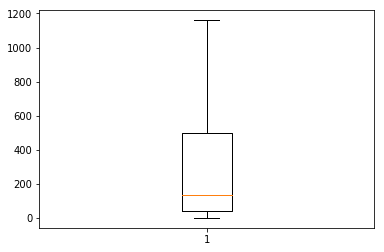

In [131]:
def iqr_outliers(x):
    if x > (Q3 + (1.5*IQR)):
        x=Q3
    elif x <(Q1 - (1.5*IQR)):
        x=Q1
    else:
        pass
    return(x)

Q1 = df_data['C1'].quantile(0.25)
Q3 = df_data['C1'].quantile(0.75)
IQR = iqr(df_data['C1'])
df_data['C1']=df_data['C1'].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(df_data.C1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccb91da20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccb9270f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccb91d8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccb927780>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccb927ac8>],
 'means': []}

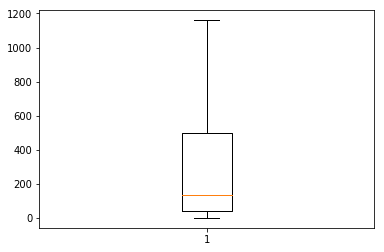

In [132]:
Q1 = df_data['C7'].quantile(0.25)
Q3 = df_data['C7'].quantile(0.75)
IQR = iqr(df_data['C7'])
df_data['C7']=df_data['C7'].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(df_data.C7)

In [142]:
Q1 = df_data["C5'"].quantile(0.25)
Q3 = df_data["C5'"].quantile(0.75)
IQR = iqr(df_data["C5'"])
df_data["C5'"]=df_data["C5'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(df_data["C5'"])

KeyError: "C5'"

In [143]:
Q1 = df_data["C6'"].quantile(0.25)
Q3 = df_data["C6'"].quantile(0.75)
IQR = iqr(df_data["C6'"])
df_data["C6'"]=df_data["C6'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(df_data["C6'"])

KeyError: "C6'"

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccb8c2860>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccb8c2ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccb8c2710>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccb84c5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccb84c908>],
 'means': []}

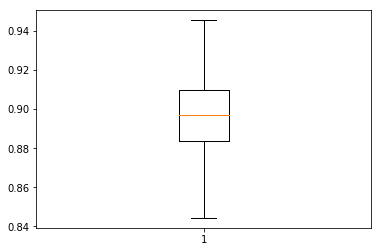

In [134]:
Q1 = df_data["T3'"].quantile(0.25)
Q3 = df_data["T3'"].quantile(0.75)
IQR = iqr(df_data["T3'"])
df_data["T3'"]=df_data["T3'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(df_data["T3'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccb819550>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccb819be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccb819400>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccb8222b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccb8225f8>],
 'means': []}

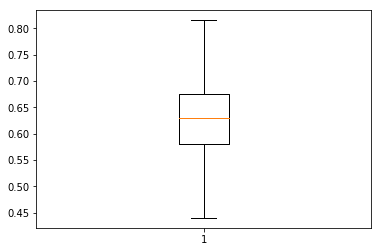

In [135]:
Q1 = df_data["T4'"].quantile(0.25)
Q3 = df_data["T4'"].quantile(0.75)
IQR = iqr(df_data["T4'"])
df_data["T4'"]=df_data["T4'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(df_data["T4'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccb7f1b70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccb7fe240>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccb7f1a20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccb7fe8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccb7fec18>],
 'means': []}

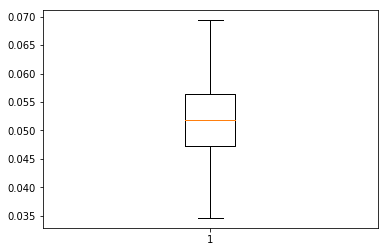

In [136]:
Q1 = df_data["T5'"].quantile(0.25)
Q3 = df_data["T5'"].quantile(0.75)
IQR = iqr(df_data["T5'"])
df_data["T5'"]=df_data["T5'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(df_data["T5'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccb7561d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccb756860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccb756080>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccb756ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccb762278>],
 'means': []}

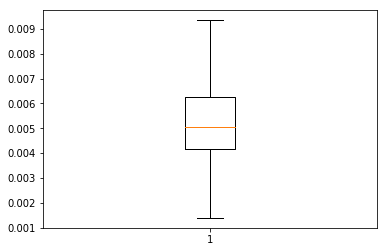

In [137]:
Q1 = df_data["S1'"].quantile(0.25)
Q3 = df_data["S1'"].quantile(0.75)
IQR = iqr(df_data["S1'"])
df_data["S1'"]=df_data["S1'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(df_data["S1'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccb730c88>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccb73a358>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccb730b38>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccb73a9e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccb73ad30>],
 'means': []}

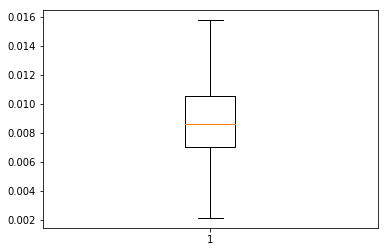

In [138]:
Q1 = df_data["S2'"].quantile(0.25)
Q3 = df_data["S2'"].quantile(0.75)
IQR = iqr(df_data["S2'"])
df_data["S2'"]=df_data["S2'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(df_data["S2'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccb6932e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccb693978>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccb693198>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccb69d048>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccb69d390>],
 'means': []}

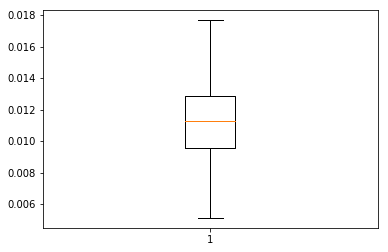

In [139]:
Q1 = df_data["S3'"].quantile(0.25)
Q3 = df_data["S3'"].quantile(0.75)
IQR = iqr(df_data["S3'"])
df_data["S3'"]=df_data["S3'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(df_data["S3'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccbeaa470>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccbeaab00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccbeaa0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccbeb21d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccbeb2518>],
 'means': []}

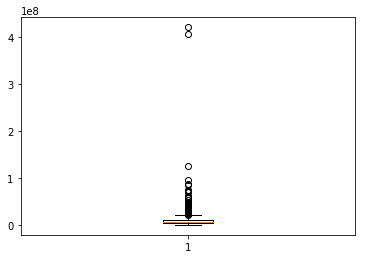

In [97]:
# Plotting box plots for identifying outliers
plt.boxplot(df_data.C6)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccbe7e668>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccbe7ecf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccbe7e518>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccbe063c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccbe06710>],
 'means': []}

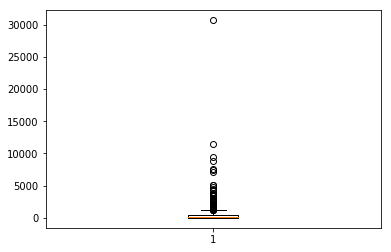

In [98]:
# Plotting box plots for identifying outliers
plt.boxplot(df_data.C7)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccbdda550>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccbddabe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccbdda400>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccbde22b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccbde25f8>],
 'means': []}

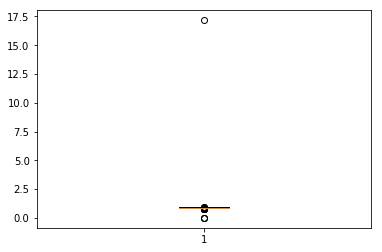

In [99]:
# Plotting box plots for identifying outliers
plt.boxplot(df_data["T3'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccbdb66a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccbdb6d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccbdb6320>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccbdbf400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccbdbf748>],
 'means': []}

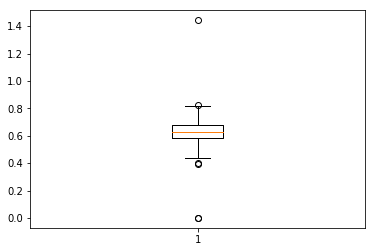

In [100]:
# Plotting box plots for identifying outliers
plt.boxplot(df_data["T4'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccbd14828>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccbd14eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccbd146d8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccbd1d588>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccbd1d8d0>],
 'means': []}

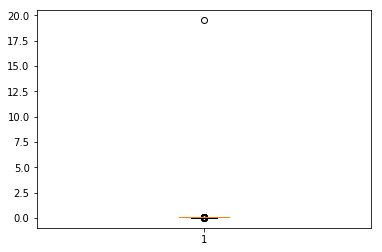

In [101]:
# Plotting box plots for identifying outliers
plt.boxplot(df_data["T5'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccbcf2f60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccbcfa630>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccbcf28d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccbcfacc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccbc85048>],
 'means': []}

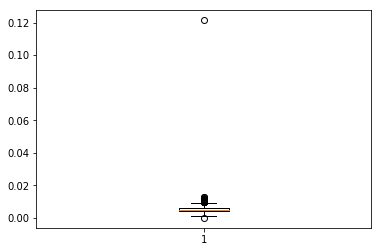

In [102]:
# Plotting box plots for identifying outliers
plt.boxplot(df_data["S1'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccbc50a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccbc59160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccbc50940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccbc597f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccbc59b38>],
 'means': []}

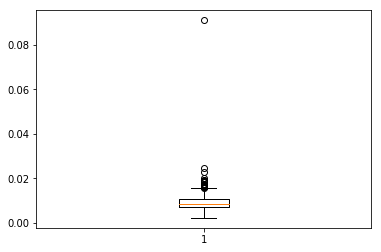

In [103]:
# Plotting box plots for identifying outliers
plt.boxplot(df_data["S2'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcccbc25f28>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcccbc2e5f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcccbc25dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcccbc2ec88>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcccbc2efd0>],
 'means': []}

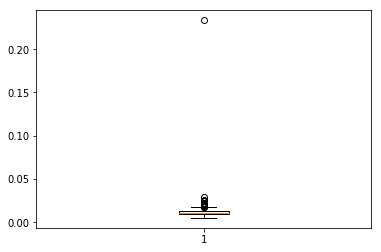

In [104]:
# Plotting box plots for identifying outliers
plt.boxplot(df_data["S3'"])

## Normalising ##

We understand that data is not going to be normally distributed. We must identify what distribution each feature/attribute has, and figure out a method to normally distribute that data to move on with our model.

We will create histograms for all data that has a `float64` data-type.

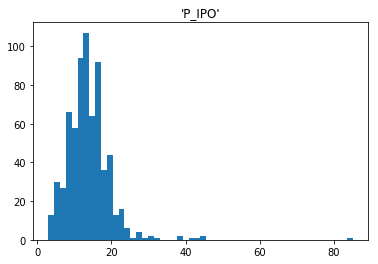

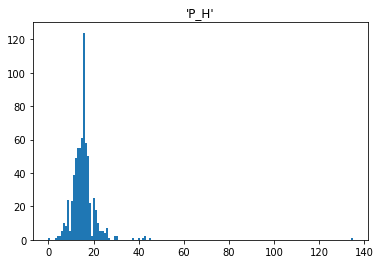

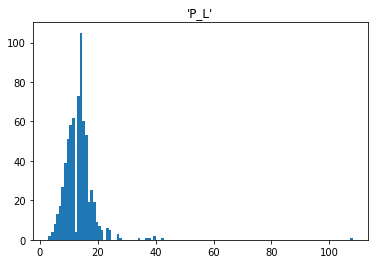

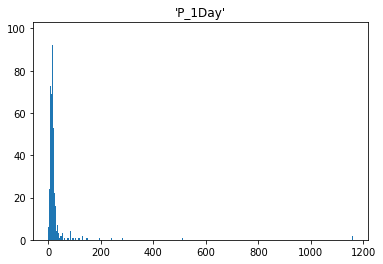

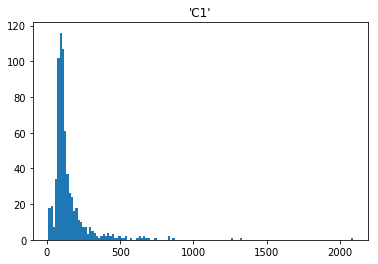

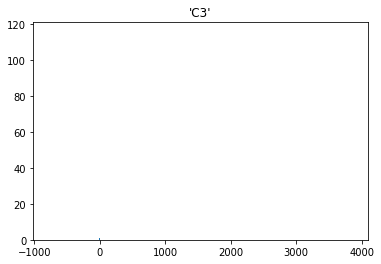

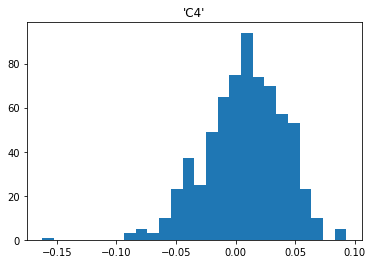

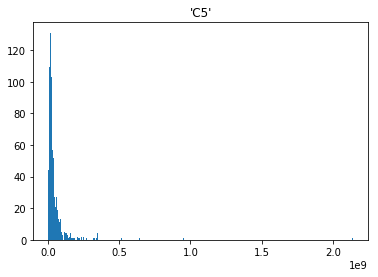

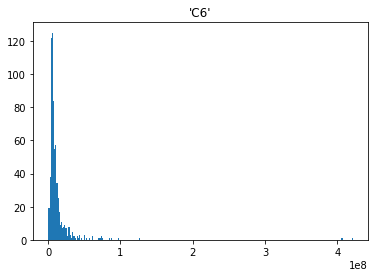

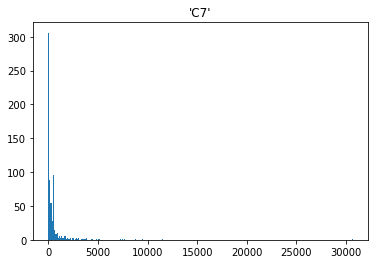

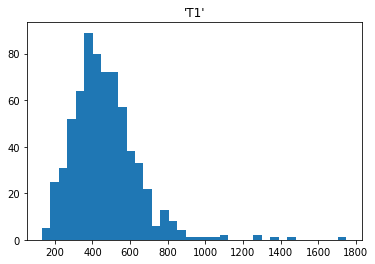

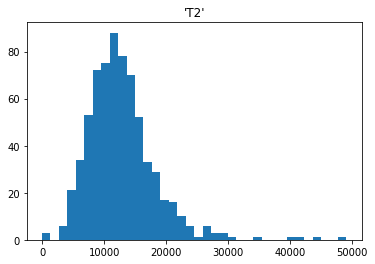

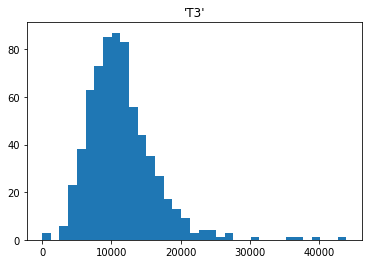

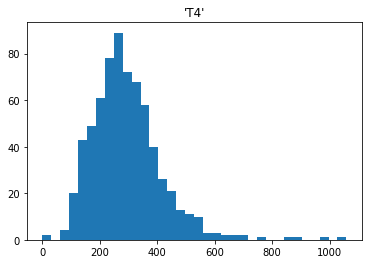

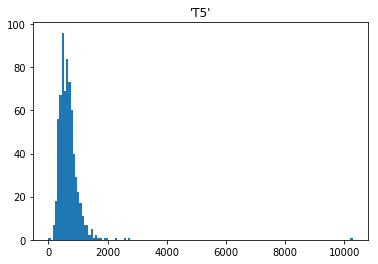

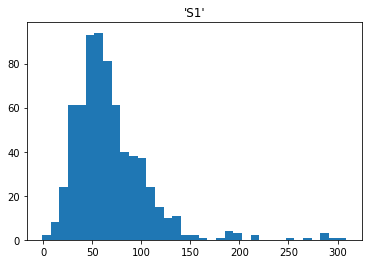

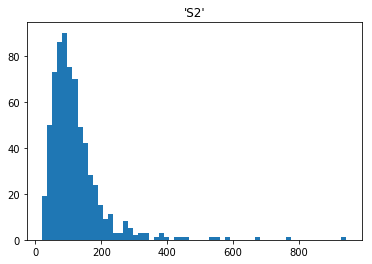

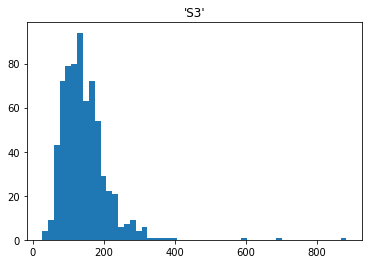

In [18]:
# Creating a 'for loop' to display each of the columns in a histogram
# would be the most efficient way to display the distribution of the features

## Creating a new variable `new_cols` to store all the features we would like
## to display with histograms
new_cols = ['P_IPO','P_H','P_L','P_1Day','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']

## Creating a new variable `plot_hists` to store the `new_cols`
## and be populated with data from the `df_data` dataframe
plot_hists = df_data[new_cols]

### Creating a for loop that will plot each column in
### the variable `plot_hists` as long as it is a column
### Using 20 `bins` for each histogram, as well
for i in range(len(plot_hists.columns)):
    plt.hist(plot_hists.iloc[:,i].dropna(),bins='auto')
### For each title, we are using the name of the column
### as it appears in the `plot_hists` variable    
    plt.title('%a' % plot_hists.columns[i])
### Ultimately showing the histogram at the end of 
### the for loop
    plt.show()

In [19]:
# Printing Skewn Value for Each Feature
## new_cols = ['P_IPO','P_H','P_L','P_1Day','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
print("skew : ",skew(df_data[new_cols]))

skew :  [ 3.36531297  9.26290144  7.14359102 12.49503902  5.73492446 21.11062311
 -0.48468728 13.63146784 12.5855317  12.35570026  1.73657529  1.63612171
  1.61366243  1.41697208 12.74415065  2.30698634  3.72907471  3.43221384]


The values that have `nan` for skewness

In [23]:
def log_transform(feature):
    df_data[feature] = np.log1p(df_data[feature].values) # does a log transform on x+1
log_transform('P_IPO')
log_transform('P_H')
log_transform('P_L')
log_transform('P_1Day')

In [19]:
##### Fixing the attributes
df_data['P_IPO'] = np.log10(df_data['P_IPO'])
df_data['P_H'] = np.log10(df_data['P_H'])
df_data['P_L'] = np.log10(df_data['P_L'])
df_data['P_1Day'] = np.log10(df_data['P_1Day'])
df_data['C1'] = np.log10(df_data['C1'])
df_data['C3'] = np.log10(df_data['C3'])
df_data['C4'] = np.log10(df_data['C4'])
df_data['C5'] = np.log10(df_data['C5'])
df_data['C6'] = np.log10(df_data['C6'])
df_data['C7'] = np.log10(df_data['C7'])
df_data['T1'] = np.log10(df_data['T1'])
df_data['T2'] = np.log10(df_data['T2'])
df_data['T3'] = np.log10(df_data['T3'])
df_data['T4'] = np.log10(df_data['T4'])
df_data['T5'] = np.log10(df_data['T5'])
df_data['S1'] = np.log10(df_data['S1'])
df_data['S2'] = np.log10(df_data['S2'])
df_data['S3'] = np.log10(df_data['S3'])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/opt/tljh/user/lib/pyt

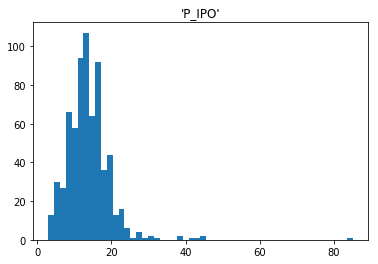

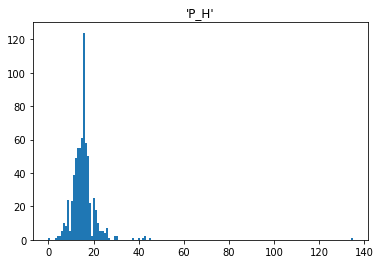

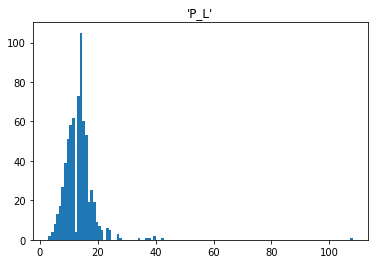

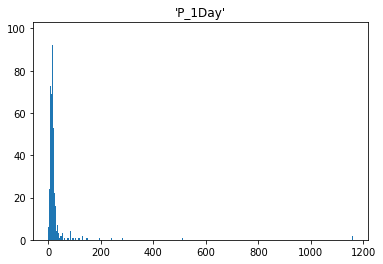

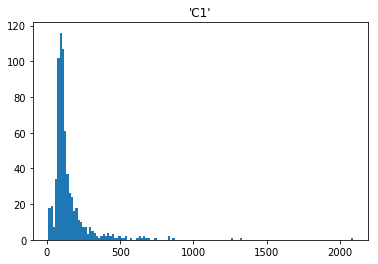

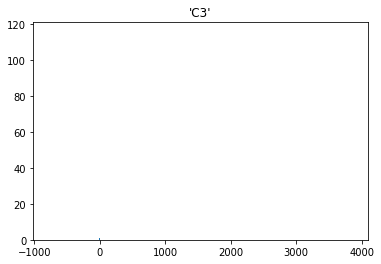

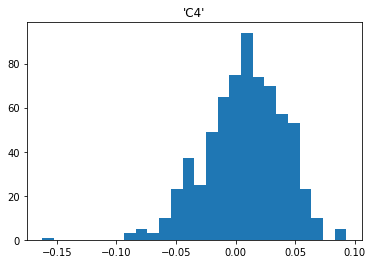

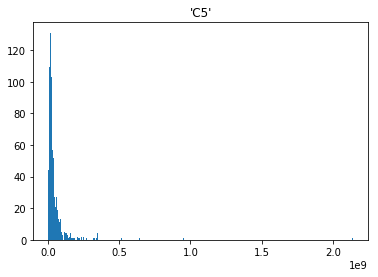

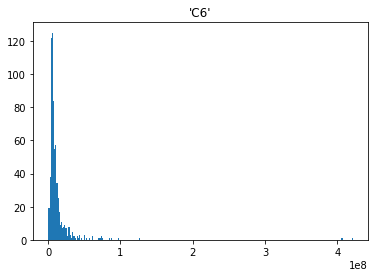

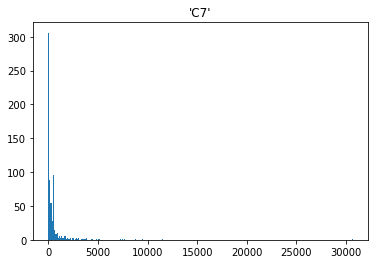

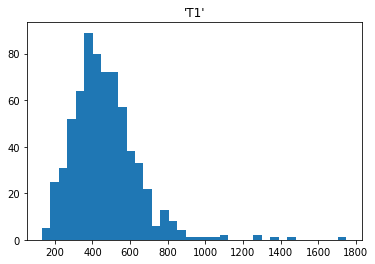

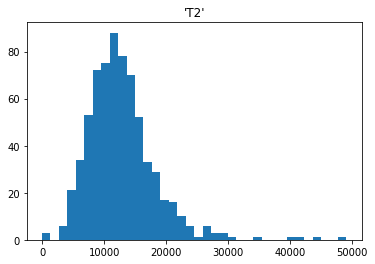

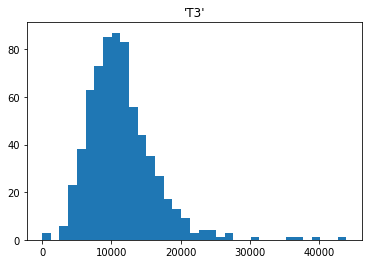

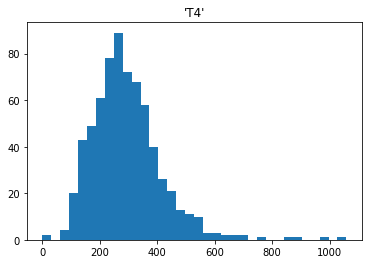

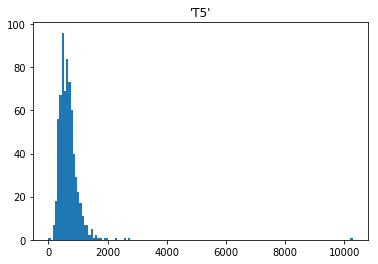

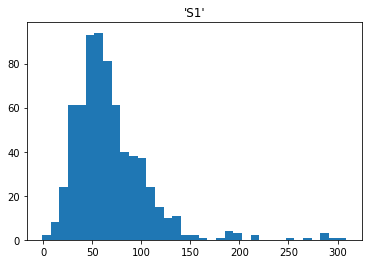

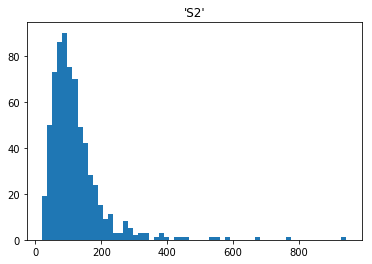

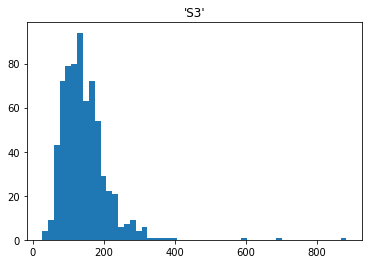

In [21]:
# Re-plotting the distributions of the attributes
for i in range(len(plot_hists.columns)):
    plt.hist(plot_hists.iloc[:,i].dropna(),bins='auto')   
    plt.title('%a' % plot_hists.columns[i])
    plt.show()